<a href="https://colab.research.google.com/github/NewCode321/ES327/blob/main/model_classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# References
1.   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
2.   https://tldrlegal.com/license/bsd-3-clause-license-(revised)#fulltext




# Install Dependencies and Mount Google Drive

In [1]:
# Install MediaPipe
!pip install mediapipe opencv-python

# Install Pims and AV
!pip install pims
!pip install av

# for SMOTE
!pip install imbalanced-learn

#for bar charts
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 29.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pims: filename=PIMS-0.6.1-py3-none-any.whl size=82634 sha256=3710805c612e78779cd74d57c5acf42053a1d29cb0a158b0aef5ba867b849ccd
  Stored in directory: /root/.cache/pip/wheels/c8/51/78/e8155864f53ff0c9e01fe656f64b55712ba60fb2a451757505
Successfully built pims
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 46.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple,

In [2]:
# Import Packages

# general
import pandas as pd
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os
import os.path as path # added to make organising directories easier

import glob #required for looping through files in directories

# for standard deviation vectors
import statistics

#for bar chart
import seaborn as sns
import plotly.express as px

#for results
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

#clean up
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [3]:
# mounting google drive to colab to access dataset

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Format Feature Vector Set 1 - standard deviation feature vectors
- run to create this feature set from the full dataframe of hand and face points with labels
- or instead load stnd_dev_df dataframe

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/small_point_df.csv')#this is the path to a csv file created from the output of the getFullDF() function from the Feature Extractor class


In [ ]:
new_df = df.iloc[:,1:-3]
new_df

,hand_point0,hand_point1,hand_point2,hand_point3,hand_point4,hand_point5,hand_point6,hand_point7,hand_point8,hand_point9,...,face_point458,face_point459,face_point460,face_point461,face_point462,face_point463,face_point464,face_point465,face_point466,face_point467
0,"[[0.2511823773384094, 0.9363031387329102], [0....","[[0.2379227727651596, 0.8879631757736206], [0....","[[0.22373244166374207, 0.8318279385566711], [0...","[[0.20144671201705933, 0.7903604507446289], [0...","[[0.18187958002090454, 0.7648208737373352], [0...","[[0.30054083466529846, 0.810973048210144], [0....","[[0.22829805314540863, 0.7983649969100952], [0...","[[0.2112008035182953, 0.7992459535598755], [0....","[[0.22020360827445984, 0.7950354218482971], [0...","[[0.3165602684020996, 0.8635585904121399], [0....",...,"[[0.28608694672584534, 0.27079758048057556], [...","[[0.2895624041557312, 0.2677152752876282], [0....","[[0.30623552203178406, 0.2779527008533478], [0...","[[0.2836371660232544, 0.27067017555236816], [0...","[[0.28626513481140137, 0.2746354043483734], [0...","[[0.3218298554420471, 0.2185247838497162], [0....","[[0.31679216027259827, 0.21977239847183228], [...","[[0.31228068470954895, 0.22067062556743622], [...","[[0.35354000329971313, 0.21712082624435425], [...","[[0.3593372404575348, 0.21209684014320374], [0..."
1,"[[0.45501503348350525, 0.7680935263633728], [0...","[[0.4463120400905609, 0.7291788458824158], [0....","[[0.42269429564476013, 0.7014383673667908], [0...","[[0.3977319002151489, 0.688961386680603], [0.4...","[[0.3763104975223541, 0.6861835718154907], [0....","[[0.4243198335170746, 0.6894711256027222], [0....","[[0.3944441080093384, 0.6519860625267029], [0....","[[0.36857351660728455, 0.6407966613769531], [0...","[[0.3468656837940216, 0.6376463174819946], [0....","[[0.42227640748023987, 0.7108439207077026], [0...",...,"[[0.6077142953872681, 0.28221219778060913], [0...","[[0.6114041805267334, 0.2809164822101593], [0....","[[0.6120705604553223, 0.290404736995697], [0.6...","[[0.6071641445159912, 0.28219980001449585], [0...","[[0.6048367619514465, 0.2845645248889923], [0....","[[0.6179423928260803, 0.23443356156349182], [0...","[[0.6159443855285645, 0.23558330535888672], [0...","[[0.6157891750335693, 0.23655124008655548], [0...","[[0.6451289653778076, 0.24248185753822327], [0...","[[0.6492809653282166, 0.2403232753276825], [0...."
2,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...",...,"[[0.4976027309894562, 0.3106212317943573], [0....","[[0.5008782744407654, 0.3086933195590973], [0....","[[0.5064212083816528, 0.32038429379463196], [0...","[[0.4965996742248535, 0.31040158867836], [0.49...","[[0.4961130619049072, 0.3137160539627075], [0....","[[0.5140247941017151, 0.28141412138938904], [0...","[[0.510439395904541, 0.28144487738609314], [0....","[[0.5078430771827698, 0.28138282895088196], [0...","[[0.5374106168746948, 0.28655219078063965], [0...","[[0.541528582572937, 0.28447577357292175], [0...."
3,"[[0.49709710478782654, 0.8215284943580627], [0...","[[0.5117023587226868, 0.7940971255302429], [0....","[[0.5328081846237183, 0.7791500687599182], [0....","[[0.5527566075325012, 0.7714900970458984], [0....","[[0.5675399303436279, 0.766732394695282], [0.5...","[[0.535225510597229, 0.7761654257774353], [0.5...","[[0.5589685440063477, 0.7485855221748352], [0....","[[0.5719754099845886, 0.729156494140625], [0.5...","[[0.5814388990402222, 0.7147162556648254], [0....","[[0.5370717644691467, 0.7789297103881836], [0....",...,"[[0.37093251943588257, 0.2519857883453369], [0...","[[0.37522298097610

In [ ]:
y = df.iloc[:,-1]
print(np.array(y))

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
# Convert the contents of each cell back to a list 
import ast

def toList(string_list):
  return ast.literal_eval(string_list)

temp_df = new_df.applymap(toList)#new_df later


In [ ]:
# Calculate the product of the standard deviations for x and y coordinates of each point

def toStDev(cell):
  list1, list2 = zip(*cell)
  return (statistics.pstdev(list(list1)))*(statistics.pstdev(list(list2)))
final_df = temp_df.applymap(toStDev)

final_df = pd.concat([final_df, df.iloc[:,-1]], axis=1, join="inner")

final_df

In [ ]:
# Uncomment to save new feature set as a csv file
# # save to csv file
# final_df.to_csv('/content/gdrive/MyDrive/feature_sets/stnd_dev_df.csv')  

# Format Feature Vector Set 2 - motion history image histogram feature vectors
- run to create this feature set from the output of the getPointMhiDF() function from the Feature Extractor class
- or instead load stnd_dev_df dataframe

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/mhi_hists2.csv')#this is the path to a csv file created from the output of the getPointMhiDF() function from the Feature Extractor class
df

In [ ]:
# # define the list of labels in the. smaller dataset to filter for
# cities = [4,6,7,9,11]

# # filter the DataFrame based on the values in the 'Labels' column
# filtered = df[df['Labels'].isin(cities)]

# # create a new DataFrame with the filtered results
# filtered_df = pd.DataFrame(filtered)

In [ ]:
# define a list of values to replace
old_labels = [4,6,7,9,11]

# replace values in the 'City' column
new_labels = [0,1,2,3,4]
filtered_df['Labels'] = filtered_df['Labels'].replace(old_labels, new_labels)

In [ ]:
new_df = df.iloc[:,16:-1]
new_df

,Descriptor15,Descriptor16,Descriptor17,Descriptor18,Descriptor19,Descriptor20,Descriptor21,Descriptor22,Descriptor23,Descriptor24,Descriptor25,Descriptor26,Descriptor27,Descriptor28,Descriptor29
0,77,296,344,181,227,253,299,353,360,652,990,716,976,1202,1643
1,80,162,260,472,368,567,620,458,236,338,310,350,285,491,935
2,71,82,74,109,106,137,36,120,186,440,441,646,808,1135,1785
3,164,438,215,359,376,583,556,400,734,356,753,777,349,729,1170
4,6,21,22,17,41,46,137,139,275,263,409,557,566,618,1140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,122,151,80,91,152,245,490,240,340,364,539,648,737,1076,1861
80,259,302,357,309,274,345,448,668,673,1029,1029,1042,1424,971,2117
81,39,90,27,66,43,81,143,171,260,333,322,535,698,1036,1754
82,282,547,635,741,657,359,434,817,1152,1300,1171,1091,1376,1294,1705


In [ ]:
y = filtered_df.iloc[:,-1]
print(np.array(y))


[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
final_df = pd.concat([new_df, filtered_df.iloc[:,-1]], axis=1, join="inner")
final_df

,Descriptor15,Descriptor16,Descriptor17,Descriptor18,Descriptor19,Descriptor20,Descriptor21,Descriptor22,Descriptor23,Descriptor24,Descriptor25,Descriptor26,Descriptor27,Descriptor28,Descriptor29,Labels
9,28,31,48,44,123,245,259,184,331,454,603,746,698,701,1519,0
10,541,445,115,214,218,175,378,335,218,201,249,604,810,930,1828,0
11,39,79,91,195,175,128,113,177,213,280,255,329,435,531,1747,0
12,50,125,117,273,476,273,162,333,299,499,553,1138,1623,1573,3130,0
13,167,122,221,412,425,1037,268,201,504,504,233,349,512,675,2282,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,122,151,80,91,152,245,490,240,340,364,539,648,737,1076,1861,4
80,259,302,357,309,274,345,448,668,673,1029,1029,1042,1424,971,2117,4
81,39,90,27,66,43,81,143,171,260,333,322,535,698,1036,1754,4
82,282,547,635,741,657,359,434,817,1152,1300,1171,1091,1376,1294,1705,4


In [ ]:
# save to csv file
final_df.to_csv('/content/gdrive/MyDrive/feature_sets/small_mhi_hist_df.csv') 

# Feature Engineering
- can run for both feature sets 

In [ ]:
# Load feature set 1 or 2
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/feature_sets/stnd_dev_df.csv')
df = df.iloc[:,1:]#because the function above adds a column of index values
df.head()

,hand_point0,hand_point1,hand_point2,hand_point3,hand_point4,hand_point5,hand_point6,hand_point7,hand_point8,hand_point9,...,face_point459,face_point460,face_point461,face_point462,face_point463,face_point464,face_point465,face_point466,face_point467,Label
0,0.000296,0.000236,0.000131,0.000107,0.000183,1.453516e-04,0.000040,0.000050,0.000118,2.321019e-04,...,0.000093,0.000079,0.000096,0.000092,0.000069,0.000072,0.000076,0.000052,0.000052,0
1,0.000001,0.000001,0.000001,0.000003,0.000006,7.363221e-07,0.000001,0.000001,0.000001,6.310801e-07,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000002,0.000002,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000022,0.000018,0.000023,0.000021,0.000018,0.000018,0.000018,0.000015,0.000015,0
3,0.101915,0.104917,0.108062,0.110494,0.111660,1.066543e-01,0.106823,0.106202,0.105497,1.038615e-01,...,0.000004,0.000003,0.000004,0.000004,0.000003,0.000003,0.000004,0.000005,0.000005,0
4,0.040787,0.042025,0.041048,0.040132,0.039389,3.622049e-02,0.034371,0.035515,0.037130,3.543026e-02,...,0.000145,0.000151,0.000144,0.000145,0.000175,0.000168,0.000162,0.000184,0.000182,0


In [ ]:
# Loadto delete!!
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/point_df.csv')
df = df.iloc[:,1:]#because the function above adds a column of index values
df.head()

,hand_point0,hand_point1,hand_point2,hand_point3,hand_point4,hand_point5,hand_point6,hand_point7,hand_point8,hand_point9,...,face_point461,face_point462,face_point463,face_point464,face_point465,face_point466,face_point467,Hand Index,Face Index,Label
0,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.14...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.17...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.23...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.28...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.33...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.19...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.25...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.31...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.35...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.16...",...,"[[0.4241120219230652, 0.18556655943393707], [0...","[[0.4237501621246338, 0.19098690152168274], [0...","[[0.45935872197151184, 0.147007018327713], [0....","[[0.4539625644683838, 0.14766576886177063], [0...","[[0.4499393701553345, 0.1479775309562683], [0....","[[0.49229034781455994, 0.16323921084403992], [...","[[0.49937883019447327, 0.15981826186180115], [...",1,1,0
1,"[[0.3657074272632599, 0.9825038313865662], [0....","[[0.4048862159252167, 0.9334357380867004], [0....","[[0.44722843170166016, 0.8957558274269104], [0...","[[0.4805198907852173, 0.8661586046218872], [0....","[[0.5071448087692261, 0.8349137306213379], [0....","[[0.4977700114250183, 0.9554786682128906], [0....","[[0.503520667552948, 0.8742945194244385], [0.5...","[[0.4885217547416687, 0.8145413994789124], [0....","[[0.4728721082210541, 0.7734553217887878], [0....","[[0.4722485840320587, 0.9900332689285278], [0....",...,"[[0.333229660987854, 0.3214919865131378], [0.3...","[[0.336085706949234, 0.3247476816177368], [0.3...","[[0.3659207224845886, 0.2612340450286865], [0....","[[0.36044585704803467, 0.2632617950439453], [0...","[[0.3556493818759918, 0.2648804187774658], [0....","[[0.3980327546596527, 0.25171855092048645], [0...","[[0.40325093269348145, 0.24605560302734375], [...",1,1,0
2,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...",...,"[[0.5050286054611206, 0.2795778810977936], [0....","[[0.5044186115264893, 0.28311479091644287], [0...","[[0.5161095857620239, 0.24907466769218445], [0...","[[0.5126771926879883, 0.24919623136520386], [0...","[[0.510211706161499, 0.24931484460830688], [0....","[[0.5400797128677368, 0.2553204894065857], [0....","[[0.5447362065315247, 0.25145256519317627], [0...",-1,1,0
3,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...",...,"[[0.3626438081264496, 0.1858268529176712], [0....","[[0.36444684863090515, 0.19087165594100952], [...","[[0.40572383999824524, 0.13786321878433228], [...","[[0.3996041715145111, 0.13825860619544983], [0...","[[0.3941818177700043, 0.1385839879512787], [0....","[[0.443488210439682, 0.14245209097862244], [0....","[[0.450562983751297, 0.13720086216926575], [0....",1,1,1
4,"[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0...","[[0, 

In [ ]:
#delete after made pretty 1/3
df.columns[0][-2:]


# define a function to apply to each element of the array
def headers(x):
  y = x[-2:]
  return y

# apply the function to each element of the array using map
header = np.array(list(map(headers, df.columns)))

# display the original and new arrays
print("Original array:", df.columns)
print("New array:", header)

In [ ]:
#delete after made pretty 2/3
a = list(range(15))
a = a.append('Label')
a

In [ ]:
#delete after made pretty 3/3

import plotly.graph_objects as go
import pandas as pd

# include all columns in the table
pd.set_option('display.max_rows', None)

fig = go.Figure(data=[go.Table(
    header=dict(values= ['hand_point0','hand_point1','hand_point2','face_point0','face_point1','face_point2','Label'],
                fill_color='orange',
                align='left'),
    cells=dict(values=[df.hand_point0, df.hand_point1, df.hand_point2, df.face_point0, df.face_point1, df.face_point2,df.Label],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [ ]:
# print info about columns in the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Columns: 490 entries, hand_point0 to Label
dtypes: float64(489), int64(1)
memory usage: 271.9 KB
None


In [ ]:
# Get the features and labels as numpy arrays

X = np.array(df.iloc[:,0:-1])
y = np.array(df.iloc[:,-1])

In [ ]:
#new dependencies
from sklearn.decomposition import PCA #PCA package
from sklearn.preprocessing import StandardScaler #package to normalise the data
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

## SMOTE
- applied to training data only

In [ ]:
from sklearn.model_selection import train_test_split
res = train_test_split(X, y, train_size=0.8,test_size=0.2,random_state=1)

X_train, X_test, y_train, y_test = res # split trainnig and testing data

print("Before OverSampling, counts of label '4': {}".format(sum(y_train == 4)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors = 2)


X_train_res, y_train_res = smote.fit_resample(X_train, y_train) # resample training data

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '4': 12
Before OverSampling, counts of label '3': 3
Before OverSampling, counts of label '2': 15
Before OverSampling, counts of label '1': 20
Before OverSampling, counts of label '0': 6 

After OverSampling, the shape of X_train: (100, 489)
After OverSampling, the shape of y_train: (100,) 

After OverSampling, counts of label '4': 20
After OverSampling, counts of label '3': 20
After OverSampling, counts of label '2': 20
After OverSampling, counts of label '1': 20
After OverSampling, counts of label '0': 20


### Training Data Distribution Bar Chart - without SMOTE
- source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py 

In [ ]:
CLASS_LABELS = ["Interested", "Thinking" , "Unsure" , "Surprised" , "Happy"]

In [ ]:
fig = px.bar(x = CLASS_LABELS,
             y = [list(y_train).count(i) for i in np.unique(list(y_train))] , 
             color = np.unique(y_train) ,
             color_continuous_scale="oryel") 
fig.update_xaxes(title="Engagement Levels")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
# # save the image!
# fig.write_image("/content/gdrive/MyDrive/figures/train_distr.png")

### Training Data Distribution Bar Chart - with SMOTE
- source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py 

In [ ]:
CLASS_LABELS = ["Interested", "Thinking" , "Unsure" , "Surprised" , "Happy"]

In [ ]:
fig = px.bar(x = CLASS_LABELS,
             y = [list(y_train_res).count(i) for i in np.unique(list(y_train_res))] , 
             color = np.unique(y_train_res) ,
             color_continuous_scale="oryel") 
fig.update_xaxes(title="Engagement Levels")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
# # save the image!
# fig.write_image("/content/gdrive/MyDrive/figures/train_distr_smote.png")

## PCA
tutorial sources:
- https://www.statology.org/scree-plot-python/
- https://www.datacamp.com/tutorial/principal-component-analysis-in-python


In [ ]:
# Must normalise data before PCA

from sklearn.preprocessing import StandardScaler

# use balanced dataset: X_train_res ,y_train_res,  X_test, y_test
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train_res)
X_test_sc = sc.transform(X_test)

feat_cols = ['feature'+str(i) for i in range(X_train_sc.shape[1])]

X_train_sc_df = pd.DataFrame(X_train_sc ,columns=feat_cols)
X_train_sc_df

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature479,feature480,feature481,feature482,feature483,feature484,feature485,feature486,feature487,feature488
0,-0.634723,-0.635385,-0.633734,-0.631046,-0.629226,-0.628375,-0.631817,-0.634151,-0.635763,-0.629446,...,-0.231376,-0.231020,-0.228132,-0.231767,-0.231107,-0.232221,-0.232489,-0.232800,-0.228278,-0.229026
1,-0.634723,-0.635385,-0.633734,-0.631046,-0.629226,-0.628375,-0.631817,-0.634151,-0.635763,-0.629446,...,-0.231301,-0.231118,-0.228778,-0.231522,-0.230932,-0.221089,-0.224070,-0.226161,-0.209268,-0.209645
2,-0.634617,-0.635270,-0.633608,-0.630882,-0.628988,-0.628287,-0.631719,-0.634070,-0.635615,-0.629396,...,-0.219414,-0.218694,-0.213445,-0.219594,-0.219500,-0.207552,-0.208683,-0.209326,-0.185772,-0.183808
3,-0.634723,-0.635385,-0.633734,-0.631046,-0.629226,-0.628375,-0.631817,-0.634151,-0.635763,-0.629446,...,-0.235978,-0.235797,-0.232649,-0.236352,-0.235469,-0.235535,-0.235835,-0.236445,-0.235671,-0.235742
4,1.640799,1.573635,1.453169,1.334558,1.229519,1.438901,1.315117,1.268239,1.232196,1.536639,...,0.124178,0.134927,0.093796,0.123775,0.106943,0.272192,0.264984,0.258371,0.281385,0.296768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.841678,1.827617,1.810817,1.828866,1.874150,1.737345,1.610127,1.544373,1.539976,1.695942,...,0.100231,0.098930,0.056835,0.103823,0.093957,0.123006,0.125216,0.128030,0.056410,0.048589
96,-0.634723,-0.635385,-0.633734,-0.631046,-0.629226,-0.628375,-0.631817,-0.634151,-0.635763,-0.629446,...,-0.231332,-0.231077,-0.228508,-0.231624,-0.231006,-0.225756,-0.227599,-0.228944,-0.217238,-0.217770
97,1.032304,1.017910,1.028146,1.050820,1.063000,0.991349,1.022856,1.033847,1.033537,1.021379,...,-0.210584,-0.210588,-0.212670,-0.210234,-0.210861,-0.211521,-0.210799,-0.210304,-0.216499,-0.216529
98,0.744139,0.689054,0.638095,0.585699,0.542943,0.800448,0.723695,0.639643,0.590612,0.844358,...,1.513694,1.504950,1.578491,1.508752,1.534742,1.527143,1.520205,1.510280,1.550471,1.553251


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
PCs_X_train = pca.fit_transform(X_train_sc)#
PCs_X_test = pca.transform(X_test_sc)#

In [ ]:
principal_train_Df = pd.DataFrame(data = PCs_X_train[:,0:2], columns = ['principal component 1', 'principal component 2'])
principal_test_Df = pd.DataFrame(data = PCs_X_test[:,0:2], columns = ['principal component 1', 'principal component 2'])

In [ ]:
principal_Df = pd.concat([principal_train_Df,principal_test_Df])
principal_Df['Label'] = y_train_res.tolist() + y_test.tolist()

principal_Df

,principal component 1,principal component 2,Label
0,-5.216907,-2.550219,4
1,-5.085267,-2.557320,4
2,-4.720080,-2.580020,3
3,-5.300597,-2.544814,3
4,2.935525,6.890965,2
...,...,...,...
10,-5.240022,-2.549267,0
11,-5.218700,-2.550390,2
12,-5.021957,-2.563376,3
13,-5.192163,-2.550937,2


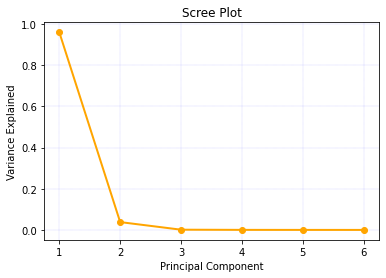

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='orange')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(color = 'blue', linestyle = '--', linewidth = 0.1)
# # save the image
# plt.savefig("/content/gdrive/MyDrive/figures/scree_plt1.png")
plt.show()

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.60059706e-01 3.81053370e-02 1.18273732e-03 3.07169997e-04
 1.42691646e-04 9.13178862e-05]


In [ ]:
# scatter plot matrix made with plotly express
# source: https://plotly.com/python/splom/

import plotly.express as px
df = principal_Df
fig = px.scatter_matrix(df,
    dimensions=['principal component 1', 'principal component 2'],
    color="Label")
fig.show()

In [ ]:
# # save the image!
# fig.write_image("/content/gdrive/MyDrive/figures/pca_plts1.png")

# ML Classifier Comparision
- source: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
- BDD liscense: https://tldrlegal.com/license/bsd-3-clause-license-(revised)#fulltext

In [ ]:
# Setting the final train/test variables for the classifierers
X_train = PCs_X_train[:,0:2]
y_train = y_train_res

X_test = PCs_X_test[:,0:2] 
y_test

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [ ]:
# some more dependencies
!pip install -U scikit-learn --user

from sklearn.inspection import DecisionBoundaryDisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


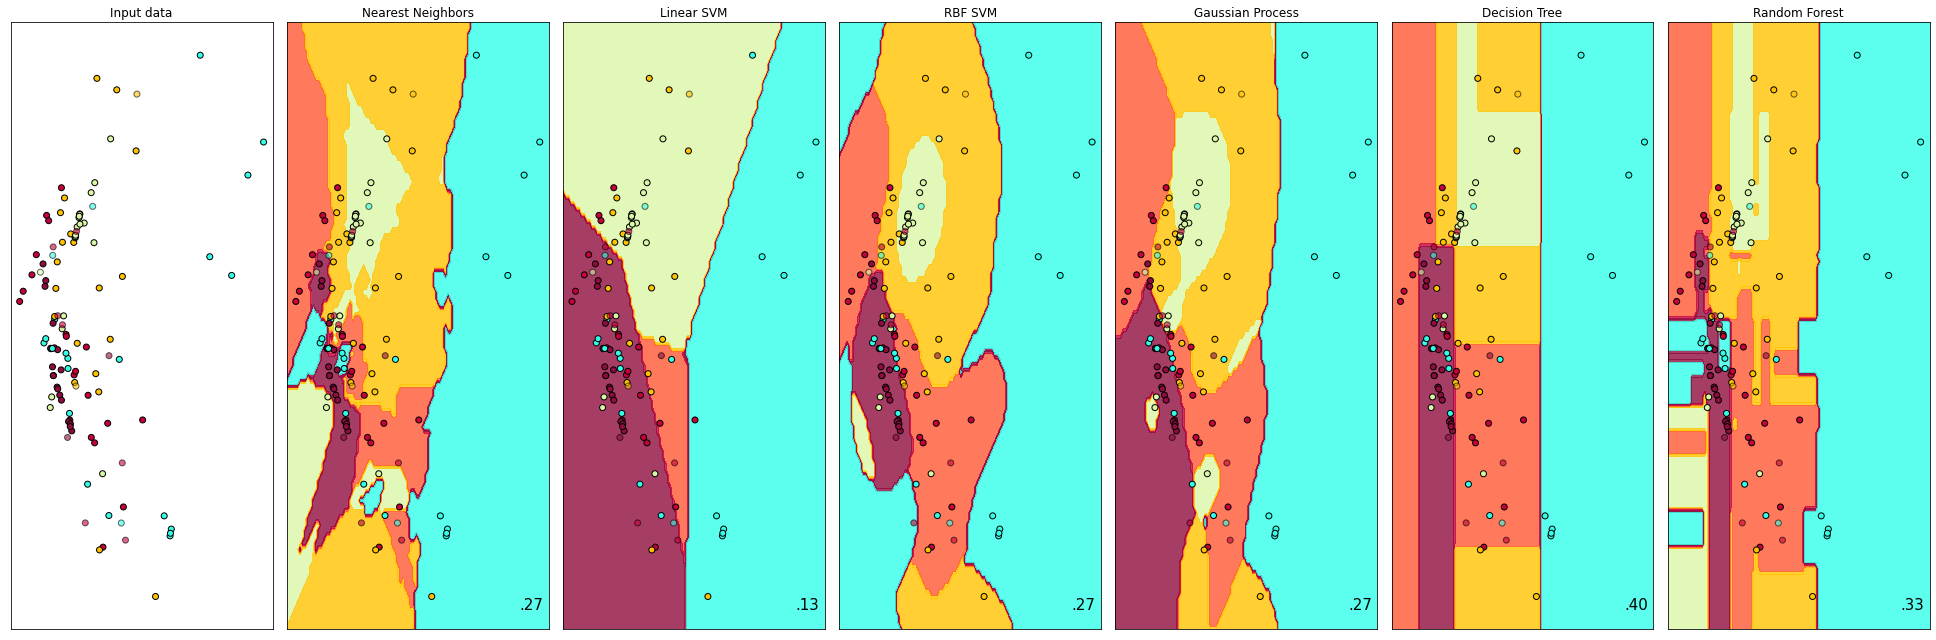

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified 
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

figure = plt.figure(figsize=(27, 9))
i = 1


# Get min and max values of the data for scaling the plot
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# just plot the dataset first
cm_bright = ListedColormap(['#DAF7A6', '#FFC300','#FF5733','#C70039','#900C3F','#33FFE9'])
cm_dark = ListedColormap(['#DAF7A6', '#FFC300','#FF5733','#C70039','#900C3F','#33FFE9'])

ax = plt.subplot(1, len(classifiers) + 1, i)
ax.set_title("Input data")

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=cm_bright, alpha=0.8, ax=ax, eps=0.5
    )

    # Plot the training points
    ax.scatter(
        X_train[:, 0],
        X_train[:, 1],
        c=y_train,
        cmap=cm_dark,
        edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, 0],
        X_test[:, 1],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(
        x_max - 0.3,
        y_min + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    i += 1

plt.tight_layout()
# to savethe figure
# plt.savefig("/content/gdrive/MyDrive/figures/SML_classifier_plt1.png")
plt.show()